The USS Enterprise was an interstellar space ship launched a month ago. With almost 13,000 passengers on board, with the goal of transporting passengers from our solar system to three newly habitable exoplanets orbiting nearby stars.

While travelling through the space USS Enterprise collided with a
spacetime anomaly hidden within a dust cloud. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('/content/drive/MyDrive/dataset/space_train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False



Explanation of datset
* people from earth mars and europa set a journey to trappist 1e , pso j3 ,55 cancri
* explain cryo-sleep any why it is used
* cabin: position inside the ship in which passengers are staying
* Goal: to predict if the passenger got teleported or not




In [ ]:
print(df['Destination'].unique())
print(df['HomePlanet'].unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
['Europa' 'Earth' 'Mars' nan]


In [ ]:
print(df['Transported'].value_counts())
#print(df['Cabin'].value_counts())
print(df['HomePlanet'].value_counts())

True     4378
False    4315
Name: Transported, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


drop passenger id and name (by seperating X)because it does not contribute to the determine the result

In [ ]:
X=df.iloc[:,1:-2]
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


remove all alpabets and numbers from cabin except p and s which denote port side (left) and starboard side (right) respectively

In [ ]:
X['Cabin'] = X['Cabin'].str.replace('.*/.*/', '', regex=True)
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
X.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

filled all the string values using mode function

In [ ]:
fill_mode=['HomePlanet','CryoSleep','Cabin','Destination','VIP']
for i in fill_mode:
   X[i].fillna(X[i].mode().iloc[0], inplace=True)

filled all the numeric values using mean function

In [ ]:
fill_mean=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in fill_mean:
   X[i].fillna(X[i].mean(), inplace=True)

In [ ]:
X.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

columns_to_encode=['HomePlanet','CryoSleep','Cabin','Destination','VIP']
for i in columns_to_encode:
    X[i] = le.fit_transform(X[i])
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,1,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,1,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,1,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.44038529, -0.73277002, -1.03286462, ..., -0.29081703,
        -0.27666342, -0.26902263],
       [-0.81725903, -0.73277002,  0.9681811 , ..., -0.24896783,
         0.2115053 , -0.23019432],
       [ 0.44038529, -0.73277002,  0.9681811 , ..., -0.29081703,
         5.69428913, -0.22578201],
       ...,
       [-0.81725903, -0.73277002,  0.9681811 , ...,  2.84285059,
        -0.27577423, -0.26902263],
       [ 0.44038529, -0.73277002,  0.9681811 , ..., -0.29081703,
         0.03722284,  2.58574044],
       [ 0.44038529, -0.73277002,  0.9681811 , ..., -0.29081703,
        -0.27666342, -0.25843309]])

In [ ]:
y=df.iloc[:,-1]
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# knn
# SVC
# GaussianNB
# DT
# RF
# Adaboost
# GB
# Xgb


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score



knn = KNeighborsClassifier()
sv=SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()

models=[knn,sv,nb,dt,rf,ab,gb,xb]




un_tuned_acc=[]
for i in models:

  print("_"*20, i.__class__.__name__,"_"*20)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))
  un_tuned=accuracy_score(y_test,y_pred)
  un_tuned_acc.append(un_tuned)

____________________ KNeighborsClassifier ____________________
              precision    recall  f1-score   support

       False       0.76      0.76      0.76      1291
        True       0.77      0.77      0.77      1317

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608

____________________ SVC ____________________
              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1291
        True       0.80      0.82      0.81      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

____________________ GaussianNB ____________________
              precision    recall  f1-score   support

       False       0.85      0.49      0.62      1291
        True       0.65      0.92      0.76      1317

    accuracy        

# Hyperparameter tuning

In [ ]:
# knn
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':[3,5,7,9,11,13,15,17,19,21],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],}
clf=GridSearchCV(knn,parameters,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'uniform'}


In [ ]:

# Decision tree
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
clf = GridSearchCV(dt, parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Print the best parameters
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# gausianNB
parameters = {
    'priors': [None, [0.3, 0.5, 0.2]],
    'var_smoothing': [1e-9, 1e-7, 1e-5]
}
clf=GridSearchCV(nb,parameters,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'priors': None, 'var_smoothing': 1e-09}


In [ ]:
ab_para = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [1.0, 0.1, 0.01],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf=GridSearchCV(ab,ab_para,cv=3,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}


# tuned models

In [ ]:
# knn
# SVC
# GaussianNB
# RF
# Adaboost

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score



knn = KNeighborsClassifier(algorithm='auto', n_neighbors=19, weights='uniform')
sv=SVC()
nb = GaussianNB(priors=None, var_smoothing=1e-09)
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=10)
rf=RandomForestClassifier()
ab = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=200)
gb=GradientBoostingClassifier()
xb=XGBClassifier()

models=[knn,sv,nb,dt,rf,ab,gb,xb]
tuned_acc=[]
for i in models:

  print("_"*20, i.__class__.__name__,"_"*20)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))
  tuned=accuracy_score(y_test,y_pred)
  tuned_acc.append(tuned)

____________________ KNeighborsClassifier ____________________
              precision    recall  f1-score   support

       False       0.78      0.79      0.78      1291
        True       0.79      0.78      0.78      1317

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

____________________ SVC ____________________
              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1291
        True       0.80      0.82      0.81      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

____________________ GaussianNB ____________________
              precision    recall  f1-score   support

       False       0.85      0.49      0.62      1291
        True       0.65      0.92      0.76      1317

    accuracy        

# Graphical Representation

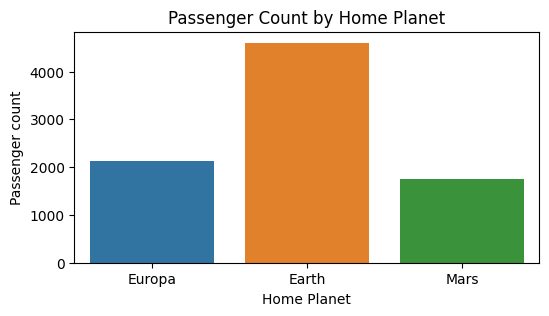

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Countplot
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='HomePlanet')
plt.title('Passenger Count by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Passenger count')
plt.show()


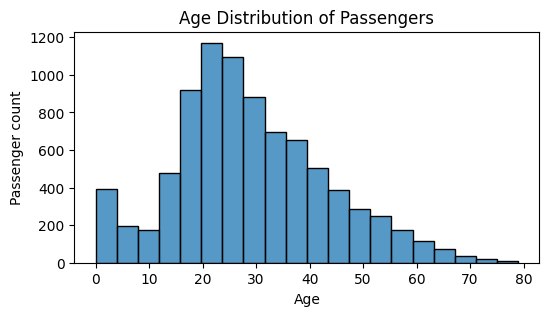

In [ ]:
# Histogram
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Passenger count')
plt.show()

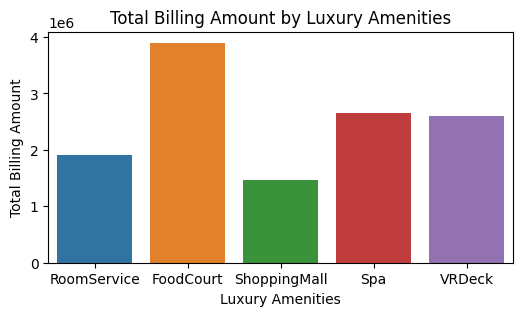

In [ ]:
# Bar Plot
plt.figure(figsize=(6,3))
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
total_billing = df[amenities].sum()
sns.barplot(x=amenities, y=total_billing)
plt.title('Total Billing Amount by Luxury Amenities')
plt.xlabel('Luxury Amenities')
plt.ylabel('Total Billing Amount')
plt.show()

amount of money spend in services

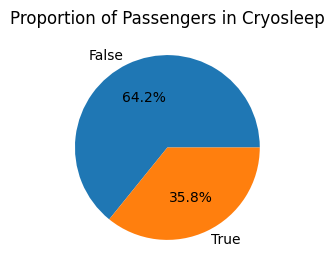

In [ ]:
# Pie Chart
plt.figure(figsize=(6,3))
cryosleep_counts = df['CryoSleep'].value_counts()
plt.pie(cryosleep_counts, labels=cryosleep_counts.index, autopct='%.1f%%')
plt.title('Proportion of Passengers in Cryosleep')
plt.show()

# highest accuracy

In [ ]:
accuracy_table = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier",  "RandomForestClassifier","AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier"],

    "accuracy_without_tuning": un_tuned_acc,
    "accuracy_with_tunning":tuned_acc

})

accuracy_table.style.highlight_max(subset=["accuracy_without_tuning","accuracy_with_tunning"], color='blue', axis=0)

,Algorithm,accuracy_without_tuning,accuracy_with_tunning
0,KNeighborsClassifier,0.765337,0.782975
1,SVC,0.803298,0.803298
2,GaussianNB,0.703221,0.703221
3,DecisionTreeClassifier,0.728528,0.778374
4,RandomForestClassifier,0.780291,0.780291
5,AdaBoostClassifier,0.792561,0.798696
6,GradientBoostingClassifier,0.802147,0.802147
7,XGBRFClassifier,0.792561,0.792561
